# Notebook for the figures generated in Workflow1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from glob import glob
import re
from scipy.stats import wilcoxon, mannwhitneyu

# Set default configuration for all plots
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 7, 'font.family': 'sans-serif'})
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['axes.titlesize'] = 7
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['xtick.minor.width'] = 0.3
plt.rcParams['ytick.minor.width'] = 0.3
plt.rcParams['legend.frameon'] = False
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['xtick.major.pad'] = 1
plt.rcParams['ytick.major.pad'] = 1
plt.rcParams['axes.labelpad'] = 1
plt.rcParams['patch.linewidth'] = 0.25
plt.rcParams["axes.unicode_minus"] = True
plt.figsize = (2,2)    

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
## save the final result data to the supplemntary table
import pandas as pd
df = pd.read_csv('./data/GO_term_analysis/simrank_pval_LLM_processed_selected_1000_go_terms.tsv', sep='\t')
# check if there is any NA 
df.isna().sum()

df.to_csv('./supplementary_information/Supplementary Table 2', sep='\t', index=False)

### Extendend data fig 1

GO term size distribution 

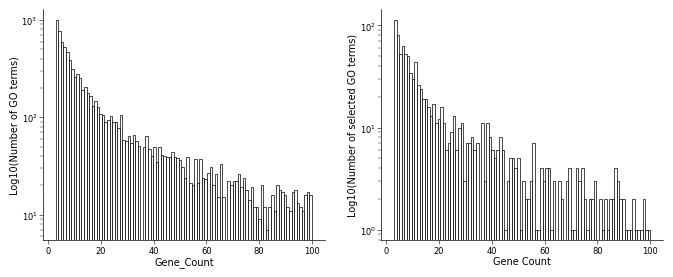

In [8]:
## distribution of original go term sizes
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

go_terms = pd.read_csv('data/go_terms.csv', sep = ',',index_col=0)
# only show go terms from 3-100
filtered_go_terms = go_terms[(go_terms['Gene_Count']>=3) & (go_terms['Gene_Count']<=100)]

input_file = 'data/GO_term_analysis/1000_selected_go_terms.csv'
thousand_GO = pd.read_csv(input_file, sep = ',')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
# Apply log transformation to the 'Gene_Count' column
# go_terms['log_Gene_Count'] = np.log2(go_terms['Gene_Count'])
ax[0].set_yscale("log")
ax[1].set_yscale("log")
# Plotting the distribution of the log-transformed data
sns.histplot(filtered_go_terms['Gene_Count'], bins=100, edgecolor='black',color='white', linewidth=0.5, rasterized=True, ax=ax[0])
sns.histplot(thousand_GO['Gene_Count'], bins=100, edgecolor='black',color='white', linewidth=0.5, rasterized=True, ax=ax[1])

plt.xlabel('Gene Count')
ax[0].set_ylabel('Log10(Number of GO terms)')
ax[1].set_ylabel('Log10(Number of selected GO terms)')
sns.despine()
plt.savefig('figures/GO_BP_size_distribution.svg', bbox_inches='tight')
plt.show()


### Fig. 2 
### Panel b: CDF of the similarity quantile with random curve
random similarity from picking a random GO from the thousand GO terms

Count cutoff at similarity percentile 95.00%: 603


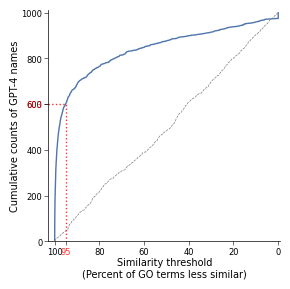

In [19]:
df = pd.read_csv('data/GO_term_analysis/simrank_LLM_processed_selected_1000_go_terms.tsv', sep='\t')

fig, ax = plt.subplots(figsize=(3,3))


# Calculate the cumulative counts
df_sorted = df["true_GO_term_sim_percentile"].sort_values(ascending=False)
cumulative_counts = np.arange(1, len(df_sorted) + 1)

# Draw the ECDF with raw counts on the y-axis
# x axis be the percentage not the raw fraction
#66C5CC,#F6CF71,#F89C74,#DCB0F2,#87C55F,#9EB9F3,#FE88B1,#C9DB74,#8BE0A4,#B497E7,#D3B484,#B3B3B3
ax.plot([perc*100 for perc in df_sorted], cumulative_counts, color='#4f75ad', linewidth=1, label='Assigned GO')

rand_percentiles = df['random_sim_percentile'].sort_values(ascending=False)
cumulative_counts_random = np.arange(1, len(rand_percentiles) + 1)
ax.plot([perc*100 for perc in rand_percentiles], cumulative_counts_random, color='#818181', linewidth=0.5, linestyle='--', label='Random GO')


# find the sim percentile at count_cutoff
for sim_percentile_cutoff in [0.95]:
    
    count_cutoff = df_sorted[df_sorted >= sim_percentile_cutoff].count()
    print(f'Count cutoff at similarity percentile {sim_percentile_cutoff*100:.2f}%: {count_cutoff}')

    # print(f'Similarity percentile at count cutoff {count_cutoff}: {sim_percentile_at_count_cutoff*100:.2f}%')

    ax.plot([103, sim_percentile_cutoff*100, sim_percentile_cutoff*100], [count_cutoff, count_cutoff, 0], color='red', linestyle=':', alpha= 0.8,linewidth=1)

    

    # Set ticks on the x-axis and y-axis
    ax.set_xticks(list(ax.get_xticks()) + [sim_percentile_cutoff*100])
    ax.set_yticks(list(ax.get_yticks()) + [count_cutoff] )

    # Get the tick labels
    xticklabels = ax.get_xticklabels()
    yticklabels = ax.get_yticklabels()


    # Modify specific tick label color on x-axis
    xticklabels[-1].set_color('red')
    xticklabels[-1].set_alpha(0.8)

    # Modify specific tick label color on y-axis
    yticklabels[-1].set_color('red')
    yticklabels[-1].set_alpha(0.8)

# invert x axis
plt.gca().invert_xaxis()

        
ax.set_xlim(103, -1)
ax.set_ylim(0, 1010)
ax.set_xlabel('Similarity threshold\n(Percent of GO terms less similar)')
plt.ylabel('Cumulative counts of GPT-4 names')
# ax.text(0.12, percentage_at_0_01, 'True GO in the top 1%', horizontalalignment='left', verticalalignment='bottom', 
#          transform=ax.transAxes, fontsize=14, color='red', alpha=0.8)

sns.despine()
plt.savefig(f"figures/LLM_name_GO_term_percentile_CDF_w_random_95_perc_cutoff.svg", bbox_inches='tight')
plt.show()


## Extended Data Figure 3

CC: Counts at similarity percentile cutoff 95.00%: 642
MF: Counts at similarity percentile cutoff 95.00%: 757


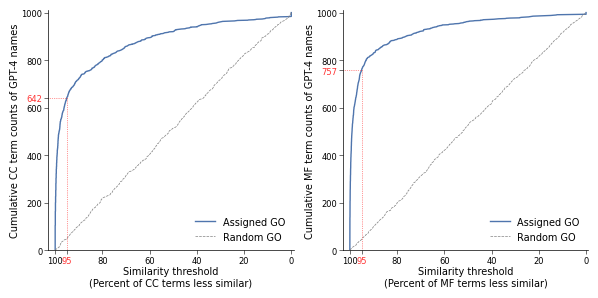

In [17]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

branches = ['CC', 'MF']

for idx, branch in enumerate(branches):
    ax = axes[idx]
    
    # Load the dataset
    df = pd.read_csv(f'data/GO_term_analysis/CC_MF_branch/sim_rank_LLM_processed_selected_1000_go_{branch}terms.tsv', sep='\t')
    
    # Calculate the cumulative counts
    df_sorted = df["true_GO_term_sim_percentile"].sort_values(ascending=False)
    cumulative_counts = np.arange(1, len(df_sorted) + 1)
    
    # Plot for Assigned GO
    ax.plot([perc*100 for perc in df_sorted], cumulative_counts, color='#4f75ad', linewidth=1, label='Assigned GO')
    
    # Plot for Random GO
    rand_percentiles = df['random_sim_percentile'].sort_values(ascending=False)
    cumulative_counts_random = np.arange(1, len(rand_percentiles) + 1)
    ax.plot([perc*100 for perc in rand_percentiles], cumulative_counts_random, color='#818181', linewidth=0.5, linestyle='--', label='Random GO')

    # Set cutoff based on true_GO_term_sim_percentile == 0.98
    cutoff_percentile = 0.95
    # Find the index closest to the cutoff percentile
    cutoff_index = (np.abs(df_sorted - cutoff_percentile)).argmin()
    cutoff_count = cumulative_counts[cutoff_index]
    print(f'{branch}: Counts at similarity percentile cutoff {cutoff_percentile*100:.2f}%: {cutoff_count}')
    # Plot the cutoff line
    ax.plot([103, cutoff_percentile*100, cutoff_percentile*100], [cutoff_count, cutoff_count, 0], color='red', linestyle=':', alpha=0.8, linewidth=0.5)
    ax.set_xticks(list(ax.get_xticks()) + [cutoff_percentile*100])
    ax.set_yticks(list(ax.get_yticks()) + [cutoff_count])
    ax.get_xticklabels()[-1].set_color('red')
    ax.get_xticklabels()[-1].set_alpha(0.8)
    ax.get_yticklabels()[-1].set_color('red')
    ax.get_yticklabels()[-1].set_alpha(0.8)
    
    # Invert x axis and set limits and labels
    ax.invert_xaxis()
    ax.set_xlim(103, -1)
    ax.set_ylim(0, 1010)
    ax.set_xlabel(f'Similarity threshold\n(Percent of {branch} terms less similar)')
    ax.set_ylabel(f'Cumulative {branch} term counts of GPT-4 names')
    ax.legend()

    sns.despine()

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("figures/LLM_name_GO_CC_MF_term_percentile_CDF_w_random_combined_95_cutoff.svg", bbox_inches='tight')
plt.show()


In [8]:
print(f"median of the similarity scores: {df['LLM_name_GO_term_sim'].median()}")
print(f"mean of the similarity scores: {df['LLM_name_GO_term_sim'].mean()}")
print(f"std of the similarity scores: {df['LLM_name_GO_term_sim'].std()}")


print(f"median of the quantile scores: {df['true_GO_term_sim_percentile'].median()}")
print(f"mean of the quantile scores: {df['true_GO_term_sim_percentile'].mean()}")
print(f"std of the quantile scores: {df['true_GO_term_sim_percentile'].std()}")


median of the similarity scores: 0.49230277499999997
mean of the similarity scores: 0.50620477945
std of the similarity scores: 0.1434311227733863
median of the quantile scores: 0.990438364224772
mean of the quantile scores: 0.9315825242718447
std of the quantile scores: 0.14723561855745396


In [16]:
print('median +sd', df['true_GO_term_sim_percentile'].median()+df['true_GO_term_sim_percentile'].std())
print('number of terms with quantile within median + std', sum((df['true_GO_term_sim_percentile'] <= df['true_GO_term_sim_percentile'].median()+df['true_GO_term_sim_percentile'].std())))

median +sd 1.2118443912473749
number of terms with quantile within median + std 1000


## Fig. 2c: example GO term for conversion between similarity to percentile ranking

randomly select a term and convers semantic similarity to percentile score

response to X-ray 0.5444585
gpt4name:  DNA Damage Response and Repair


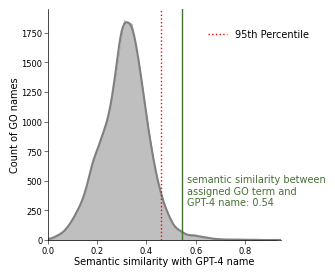

In [4]:
import numpy as np
import random 
import pandas as pd

df = pd.read_csv('data/GO_term_analysis/simrank_LLM_processed_selected_1000_go_terms.tsv', sep='\t')
# load the list of all go term similarities
with open ("data/GO_term_analysis/all_go_sim_scores_gpt4.txt", "r") as f:
    all_go_sim_list = [float(line.strip()) for line in f]
binsize = len(all_go_sim_list)//1000
start = 0 
end = binsize


# get a random index
random.seed(42)
random_index = random.randint(0, len(df)-1)

go_term = df.loc[random_index, 'Term_Description']
gpt4_name = df.loc[random_index, 'gpt_4_default Name']
sim = df.loc[df['Term_Description'] == go_term, 'LLM_name_GO_term_sim'].values[0]


print(go_term, sim)
print('gpt4name: ', gpt4_name)

# Select a distribution related to the random GO term
random_distribution = all_go_sim_list[random_index * binsize: (random_index+1) * binsize]

# Plot histogram for counts
plt.figure(figsize=(3,3))
sns.histplot(random_distribution, bins=30, color='grey', kde=True, stat='count', element='poly')


# Highlight the specific value of `sim` on the plot
plt.axvline(x=sim, color='#457135', linestyle='-', linewidth=1)

# Plot the 95th percentile in the distribution
percentile_95 = np.percentile(random_distribution, 95)
plt.axvline(x=percentile_95, color='red', linestyle=':', linewidth=1, label='95th Percentile')

# Annotate the similarity score
plt.text(sim+0.02, plt.ylim()[1]*0.15, f'semantic similarity between\nassigned GO term and\nGPT-4 name: {sim:.2f}', color='#457135', ha='left')
# set x lim 
plt.xlim(0, max(random_distribution))
plt.xlabel('Semantic similarity with GPT-4 name')
plt.ylabel('Count of GO names')
plt.legend(loc='upper left', bbox_to_anchor=(0.65, 0.95))
sns.despine()

plt.savefig(f"figures/LLM_name_GO_term_sim_against_random_count_kde_{go_term}.svg", bbox_inches='tight')
plt.show()


### Fig.3b Confidence score distribution between real contaminated and random gene sets

Among 5 models + functional enrichment analysis

In [1]:
## check the go term enrichment analysis result 
import pandas as pd
enrichr_res = pd.read_csv('./data/GO_term_analysis/100_GO_terms_enricher_res.tsv', sep='\t')
genes_col = [col for col in enrichr_res.columns if col.endswith('Genes')]
# create the count table

p_cutoff = 0.05
count_table = pd.DataFrame(columns=['Gene set type','Unassigned GO terms', 'Assigned GO terms'])

for col in genes_col: 
    num_enriched = sum(enrichr_res[f'{col} adj p-value'] <= p_cutoff)
    num_unassigned = sum(enrichr_res[f'{col} adj p-value'] > p_cutoff)
    count_row = pd.DataFrame({'Gene set type': col, 'Unassigned GO terms': num_unassigned, 'Assigned GO terms': num_enriched}, index=[0])
    count_table = pd.concat([count_table, count_row], ignore_index=True)

count_table


,Gene set type,Unassigned GO terms,Assigned GO terms
0,Genes,0,100
1,50perc_contaminated_Genes,3,97
2,100perc_contaminated_Genes,85,15


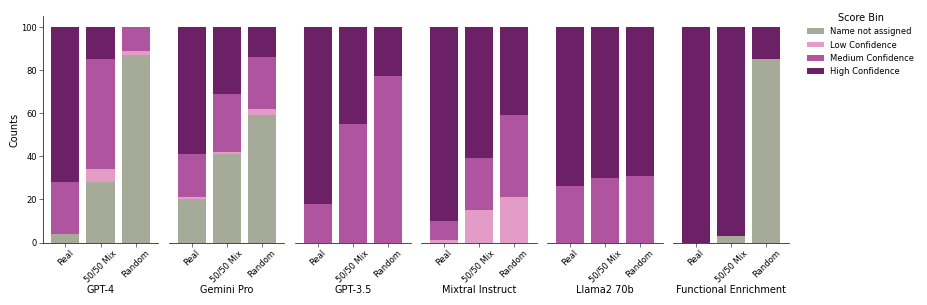

In [3]:
# Defining the custom order for Score Types and Models
score_type_order = ['Real', 'Contaminated', 'Random']
model_order = ['GPT-4', 'Gemini Pro', 'GPT-3.5', 'Mixtral Instruct', 'Llama2 70b']
score_bin_order =[ 'Name not assigned', 'Low Confidence', 'Medium Confidence', 'High Confidence']
color_palette = ['#A5AA99','#e39cc5','#af549e', '#6c2167']

combine_df = pd.read_csv('./data/GO_term_analysis/model_compare/combined_scores_df.tsv', sep='\t')
# Creating a categorical type for ordering
combine_df['Score Type'] = pd.Categorical(combine_df['Score Type'], categories=score_type_order, ordered=True)
combine_df['Model'] = pd.Categorical(combine_df['Model'], categories=model_order, ordered=True)
combine_df['Score Bin'] = pd.Categorical(combine_df['Score Bin'], categories=score_bin_order, ordered=True)

# Grouping and stacking data 
stacked_bins_data_option2 = combine_df.groupby(['Model', 'Score Type', 'Score Bin']).size().unstack().fillna(0)

# Modify the layout to include an additional subplot
fig, axes = plt.subplots(1, len(model_order) + 1, figsize=(8,3), sharey=True)

# Plotting for each model (existing code)
for i, model in enumerate(model_order):
    model_data = stacked_bins_data_option2.loc[model]
    model_data.plot(kind='bar', stacked=True, ax=axes[i], width=0.8, legend=False, color=color_palette)
    axes[i].set_xlabel(model)
    axes[i].set_xticklabels(['Real', '50/50 Mix', 'Random'], rotation=45)
    if i == 0:
        axes[i].set_ylabel('Counts')
    else:
        axes[i].yaxis.set_visible(False)

# Plotting the new stacked bar plot
count_table.plot(kind='bar', stacked=True, ax=axes[-1], x='Gene set type',y=['Unassigned GO terms', 'Assigned GO terms'], color=['#A5AA99','#6c2167'], width=0.8, legend=False)
axes[-1].set_xticklabels(['Real', '50/50 Mix', 'Random'], rotation=45)
axes[-1].set_xlabel('Functional Enrichment')
axes[-1].yaxis.set_visible(False)

# Adjusting the layout for the new plot
for i, ax in enumerate(axes):
    if i != 0:
        sns.despine(ax=ax, left=True)
    else:
        sns.despine(ax=ax)
        
plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()

fig.legend(handles, labels, title='Score Bin', loc='upper left', bbox_to_anchor=(1, 1), fontsize=6)

# Saving the figure
plt.savefig('./figures/model_compare/combined_scores_bin_counts_by_models_with_enrichr.svg', bbox_inches='tight')
plt.show()
